<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_11_Project_1_Option_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The idea behind this project is to use deep neaural network to build an adding machine and measure the performance of the model architecture.

The numbers to be used are within the range [-10,10]

In [1]:
# Import the necessary libraries
import torch
import torch.nn as nn

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats("svg")

# Create the Data

In [2]:
# Lets assign 3000 data points for training the model
N = 4000

# generate the synthetic data
my_data = torch.randint(low=-10,high=11, size=(N,2)).float()

# Assign data labels: The addition of numbers (column-wise addition)
# To create a column-oriented vector, use keepdim=True
labels = torch.sum(my_data,axis=1,keepdim=True)

In [3]:
# CHeck what has been done
for i in range(10):
    print(my_data[i], labels[i])

tensor([-8.,  9.]) tensor([1.])
tensor([ 0., -3.]) tensor([-3.])
tensor([ 6., -2.]) tensor([4.])
tensor([1., 6.]) tensor([7.])
tensor([0., 9.]) tensor([9.])
tensor([ 4., -3.]) tensor([1.])
tensor([-10.,  -3.]) tensor([-13.])
tensor([ 7., -5.]) tensor([2.])
tensor([2., 1.]) tensor([3.])
tensor([4., 2.]) tensor([6.])


In [4]:
print(my_data.shape)
print(labels.shape)

torch.Size([4000, 2])
torch.Size([4000, 1])


In [5]:
# The number of unique integers geenerated from the sum of our random numbers
torch.unique(labels).shape

torch.Size([41])

In [6]:
# Use sikitlearn to split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(my_data, labels, test_size=0.2)

# Convert them into PyTorch datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Translate into data Loader objects
batchsize = 32
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [7]:
# Define a function to create a model
def createADDModel():

    # Define the model architecture
    ADDClassify = nn.Sequential(
        nn.Linear(2,30),    # Input layer (2 features only)
        nn.ReLU(),          # Activation Unit
        nn.Linear(30,1),    # One hidden Layer
        nn.ReLU(),          # Activation Unit Again
        nn.Linear(1,1),     # Output Layer (Single Number Prediction)
        )
    
    # Define the loss function
    lossfun = nn.MSELoss()

    # Define the optimizer
    optimizer = torch.optim.Adam(ADDClassify.parameters(), lr=0.01)

    # Final Model Output
    return ADDClassify, lossfun, optimizer

In [8]:
def function2trainthemodel():

    # Define the number of epochs
    numepochs = 50

    # Create new model instance
    net, lossfun, optimizer = createADDModel()

    # Initialize the losses
    losses = np.zeros((numepochs,2))
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # Initiate batch accuracy and losses
        batchAcc = []
        batchLoss = []

        # Loop over the batches
        for X,y in train_loader:

            # Forward Pass and Loses
            yHat = net(X)
            loss = lossfun(yHat,y)

            # Back Propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Losses from this batch
            batchLoss.append(loss.item())

            # Accuracy of this batch
            batchAcc.append(100*torch.mean((np.abs(yHat.detach()-y)<1).float()))
            # End of the batch
        
        # Training Accuracy for each epoch
        trainAcc.append(np.mean(batchAcc))

        # Training LOsses for each EPoch
        losses[epochi,0] = np.mean(batchLoss)

        # Test Accuracy
        X,y = next(iter(test_loader))
        with torch.no_grad():
            yHat = net(X)
        
        # Test Losses
        losses[epochi,1] = lossfun(yHat,y).item()

        # Test Accuracy for each Epoch
        testAcc.append(100*torch.mean((np.abs(yHat.detach()-y)<1).float()))
    
    # Return the results
    return trainAcc, testAcc, losses, net

In [9]:
# Run the model once
net, lossfun, optimizer = createADDModel()
trainAcc, testAcc, losses, net = function2trainthemodel()

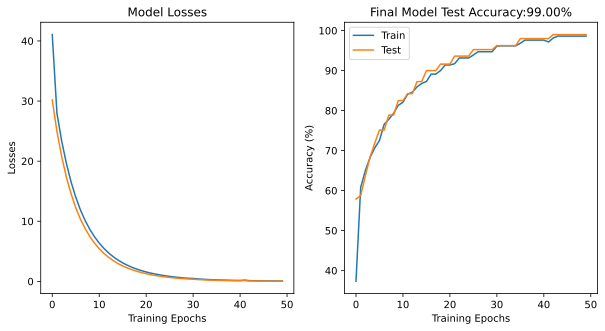

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(losses)
ax[0].set_xlabel("Training Epochs")
ax[0].set_ylabel("Losses")
ax[0].set_title("Model Losses")

ax[1].plot(trainAcc, label="Train")
ax[1].plot(testAcc,label="Test")
ax[1].set_xlabel("Training Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_title(f"Final Model Test Accuracy:{testAcc[-1]:.2f}%")
ax[1].legend()

plt.show()

In [11]:
# Try on a completely new dataset

test_data = torch.randint(low=-10,high=11, size=(N,2)).float()
test_labels = torch.sum(test_data,axis=1,keepdim=True)

with torch.no_grad():
    test_pred = net(test_data)

test_acc = 100*torch.mean((np.abs(test_pred-test_labels)<1).float())

test_acc

tensor(98.9750)

In [17]:
# Now run the model 10 times to see the consistency
for i in range(10):

    net, lossfun, optimizer = createADDModel()
    trainAcc, testAcc, losses, net = function2trainthemodel()

    print("Model Instance: {}, Train Accuracy: {}%, Test Accuracy: {}%".format(i+1, trainAcc[-1], testAcc[-1]))

Model Instance: 1, Train Accuracy: 98.8125%, Test Accuracy: 97.875%
Model Instance: 2, Train Accuracy: 98.625%, Test Accuracy: 99.0%
Model Instance: 3, Train Accuracy: 98.8125%, Test Accuracy: 97.875%
Model Instance: 4, Train Accuracy: 98.8125%, Test Accuracy: 97.875%
Model Instance: 5, Train Accuracy: 98.625%, Test Accuracy: 99.0%
Model Instance: 6, Train Accuracy: 98.625%, Test Accuracy: 99.0%
Model Instance: 7, Train Accuracy: 98.625%, Test Accuracy: 99.0%
Model Instance: 8, Train Accuracy: 98.625%, Test Accuracy: 99.0%
Model Instance: 9, Train Accuracy: 98.625%, Test Accuracy: 99.0%
Model Instance: 10, Train Accuracy: 98.625%, Test Accuracy: 99.0%


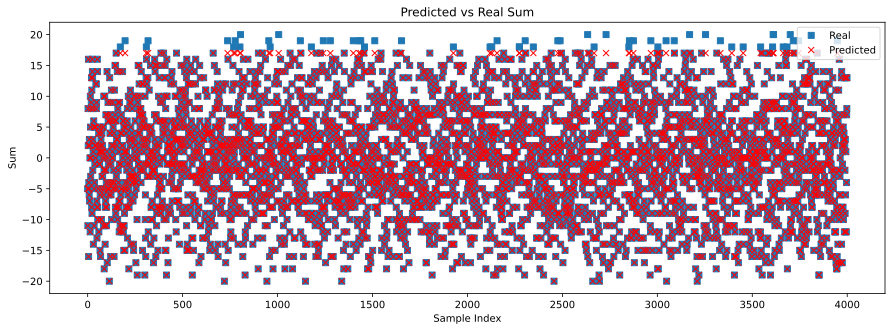

In [18]:
# Plots for final model: Turned out to be a bad prediction :)
data = torch.randint(low=-10, high=11, size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# Evaluate the Model
with torch.no_grad():
    predictions= net(data)

# Plot True and Predicted Values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,"s")
plt.plot(np.round(predictions.detach()), "rx")
plt.legend(["Real", "Predicted"])
plt.xlabel("Sample Index")
plt.ylabel("Sum")
plt.title("Predicted vs Real Sum")
plt.show()

In [19]:
test_acc = 100*torch.mean((np.abs(predictions-labels)<1).float())
test_acc

tensor(98.5750)

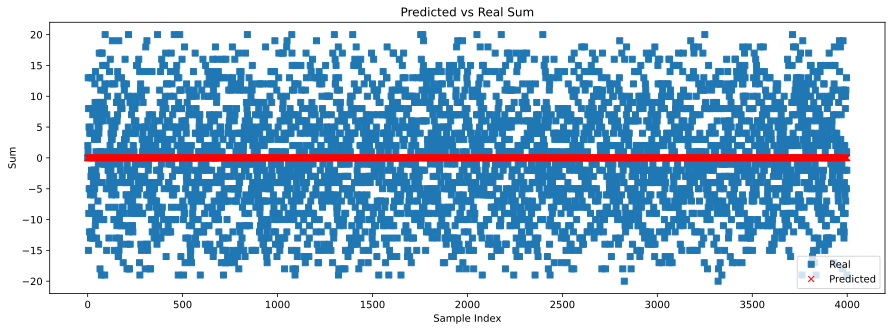

In [16]:
# Plots for final model: Turned out to be a bad prediction from a previous model with low accuracy (9%) :)
data = torch.randint(low=-10, high=11, size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# Evaluate the Model
with torch.no_grad():
    predictions= net(data)

# Plot True and Predicted Values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,"s")
plt.plot(np.round(predictions.detach()), "rx")
plt.legend(["Real", "Predicted"])
plt.xlabel("Sample Index")
plt.ylabel("Sum")
plt.title("Predicted vs Real Sum")
plt.show()

In [14]:
test_acc = 100*torch.mean((np.abs(predictions-labels)<1).float())
test_acc

tensor(9.5250)